# T81-558: Applications of Deep Neural Networks
**Module 9: Regularization: L1, L2 and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module Video Material

Main video lecture:

* [Part 9.1: Introduction to Keras Transfer Learning](https://www.youtube.com/watch?v=xyymDGReKdY&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=26)
* [Part 9.2: Popular Pretrained Neural Networks for Keras](https://www.youtube.com/watch?v=CEFcwpBneFo&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=27)
* [Part 9.3: Transfer Learning for Computer Vision and Keras](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)
* [Part 9.4: Transfer Learning for Languages and Keras](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)
* [Part 9.5: Transfer Learning for Keras Feature Engineering](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)

# Part 9.1: Introduction to Keras Transfer Learning

[What breed is that dog?](https://www.bing.com/visualsearch/Microsoft/WhatDog)



In [24]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
150/150 - 0s - loss: 1.3739
Epoch 2/100
150/150 - 0s - loss: 1.2024
Epoch 3/100
150/150 - 0s - loss: 1.0747
Epoch 4/100
150/150 - 0s - loss: 1.0081
Epoch 5/100
150/150 - 0s - loss: 0.9718
Epoch 6/100
150/150 - 0s - loss: 0.9247
Epoch 7/100
150/150 - 0s - loss: 0.8804
Epoch 8/100
150/150 - 0s - loss: 0.8373
Epoch 9/100
150/150 - 0s - loss: 0.7969
Epoch 10/100
150/150 - 0s - loss: 0.7572
Epoch 11/100
150/150 - 0s - loss: 0.7244
Epoch 12/100
150/150 - 0s - loss: 0.6965
Epoch 13/100
150/150 - 0s - loss: 0.6639
Epoch 14/100
150/150 - 0s - loss: 0.6360
Epoch 15/100
150/150 - 0s - loss: 0.6092
Epoch 16/100
150/150 - 0s - loss: 0.5842
Epoch 17/100
150/150 - 0s - loss: 0.5566
Epoch 18/100
150/150 - 0s - loss: 0.5308
Epoch 19/100
150/150 - 0s - loss: 0.5101
Epoch 20/100
150/150 - 0s - loss: 0.4897
Epoch 21/100
150/150 - 0s - loss: 0.4709
Epoch 22/100
150/150 - 0s - loss: 0.4515
Epoch 23/100
150/150 - 0s - loss: 0.4357
Epoch 24/100
150/150 - 0s - loss: 0.4221
Epoch 25/100
150/150 - 0s

In [26]:
from sklearn.metrics import accuracy_score
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

Training Accuracy: 0.9866666666666667


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [43]:
model2 = Sequential()
for layer in model.layers:
    model2.add(layer)
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [44]:
from sklearn.metrics import accuracy_score
pred = model2.predict(x)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

Training Accuracy: 0.9866666666666667


In [48]:
model3 = Sequential()
for i in range(2):
    layer = model.layers[i]
    layer.trainable = False
    model3.add(layer)
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
Total params: 1,525
Trainable params: 0
Non-trainable params: 1,525
_________________________________________________________________


[1, 2]

# Part 9.2: Popular Pretrained Neural Networks for Keras


Keras contains built in support for several pretrained models.  The the [complete list](https://keras.io/applications/) can be found in the Keras documentation.


### DenseNet

[Dense Convolutional Network (DenseNet)](https://arxiv.org/abs/1608.06993) are [provided by keras](https://keras.io/applications/#densenet)

### InceptionResNetV2
### InceptionV3
### MobileNet
### MobileNetV2
### NASNet
### ResNet, ResNetV2, ResNeXt
### VGG16
### VGG19
### Xception

# Part 9.3: Transfer Learning for Computer Vision and Keras

[Microsoft Dog Breed Image Search](https://www.bing.com/visualsearch/Microsoft/WhatDog)

In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
model = MobileNet(weights='imagenet',include_top=True)

17227776/17225924 [==============================] - 10s 1us/step


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

'___________________________________________________________________________________________'

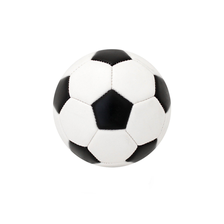

[805]
('n04254680', 'soccer_ball', 0.9999937)
('n03530642', 'honeycomb', 3.862441e-06)
('n03255030', 'dumbbell', 4.4424362e-07)
('n02782093', 'balloon', 3.7038632e-07)
('n04548280', 'wall_clock', 3.1438896e-07)


'___________________________________________________________________________________________'

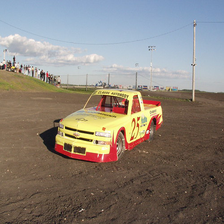

[751]
('n04037443', 'racer', 0.7131944)
('n03100240', 'convertible', 0.10089745)
('n04285008', 'sports_car', 0.07707635)
('n03930630', 'pickup', 0.026353199)
('n02704792', 'amphibian', 0.011636278)


'___________________________________________________________________________________________'

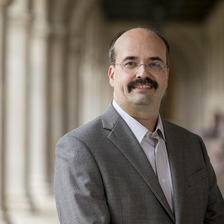

[834]
('n04350905', 'suit', 0.98860943)
('n04591157', 'Windsor_tie', 0.004567455)
('n10148035', 'groom', 0.0029069718)
('n04479046', 'trench_coat', 0.001326871)
('n02992529', 'cellular_telephone', 0.00035402752)


'___________________________________________________________________________________________'

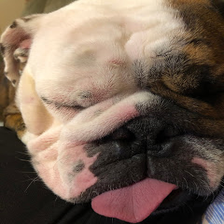

[254]
('n02110958', 'pug', 0.49527988)
('n02108915', 'French_bulldog', 0.39188683)
('n02108089', 'boxer', 0.05534879)
('n02108422', 'bull_mastiff', 0.021636484)
('n02112706', 'Brabancon_griffon', 0.016767042)


In [68]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://cdn.shopify.com/s/files/1/0712/4751/products/SMA-01_2000x.jpg?v=1537468751",
    "https://farm2.static.flickr.com/1394/967537586_87b1358ad3.jpg",
    "https://sites.wustl.edu/jeffheaton/files/2016/07/jheaton_wustl1-262izm5-458x458.jpg",
    "https://1.bp.blogspot.com/-0vGbvWUrSAA/XP-OurPTA4I/AAAAAAAAgtg/TGx6YiGBEGIMjnViDjvVnYzYp__DJ6I-gCLcBGAs/s320/B%252Bt%2525aMbJQkm3Z50rqput%252BA.jpg"
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))

    lst = decode_predictions(pred, top=5)
    for itm in lst[0]:
        print(itm)

In [50]:
pred = model.predict(x)

In [51]:
pred2 = np.argmax(pred,axis=1)
pred2

array([599, 904])

In [57]:

print(txt)

[[('n03530642', 'honeycomb', 0.16508563), ('n07248320', 'book_jacket', 0.15321428)], [('n04589890', 'window_screen', 0.19999677), ('n03196217', 'digital_clock', 0.19026165)]]


### Transfer

In [3]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
x=Dense(500,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x) 

/Users/jheaton/miniconda3/envs/wustl/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [4]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [8]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory('/Users/jheaton/Downloads/trans', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 9 images belonging to 3 classes.


In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
9/9 [==============================] - 5s 604ms/step - loss: 3.8287 - acc: 0.2222
Epoch 2/5
9/9 [==============================] - 2s 178ms/step - loss: 1.4076 - acc: 0.5556
Epoch 3/5
9/9 [==============================] - 2s 171ms/step - loss: 1.1973 - acc: 0.1111
Epoch 4/5
9/9 [==============================] - 2s 172ms/step - loss: 1.0999 - acc: 0.5556
Epoch 5/5
9/9 [==============================] - 2s 180ms/step - loss: 0.8390 - acc: 0.5556


'___________________________________________________________________________________________'

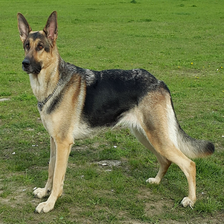

[1]


'___________________________________________________________________________________________'

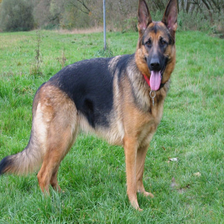

[1]


'___________________________________________________________________________________________'

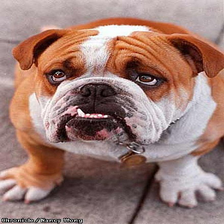

[0]


'___________________________________________________________________________________________'

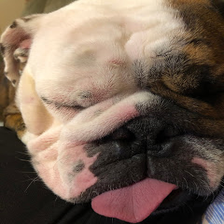

[0]


'___________________________________________________________________________________________'

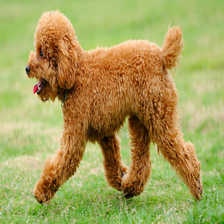

[1]


'___________________________________________________________________________________________'

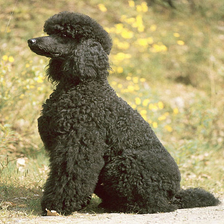

[1]


In [19]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/02.Owczarek_niemiecki_u%C5%BCytkowy_kr%C3%B3tkow%C5%82osy_suka.jpg/2560px-02.Owczarek_niemiecki_u%C5%BCytkowy_kr%C3%B3tkow%C5%82osy_suka.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/5/51/DSHwiki.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/Axel%2C_the_English_Bulldog.jpg/440px-Axel%2C_the_English_Bulldog.jpg",
    "https://1.bp.blogspot.com/-0vGbvWUrSAA/XP-OurPTA4I/AAAAAAAAgtg/TGx6YiGBEGIMjnViDjvVnYzYp__DJ6I-gCLcBGAs/s320/B%252Bt%2525aMbJQkm3Z50rqput%252BA.jpg",
    "https://thehappypuppysite.com/wp-content/uploads/2017/12/poodle1.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Pudel_Grossschwarz.jpg/440px-Pudel_Grossschwarz.jpg"
    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))


# Part 9.4: Transfer Learning for Languages and Keras

Cer, D., Yang, Y., Kong, S. Y., Hua, N., Limtiaco, N., John, R. S., ... & Sung, Y. H. (2018). [Universal sentence encoder](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175.

[Deep Transfer Learning for Natural Language Processing — Text Classification with Universal Embeddings](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)

[Keras Tutorial - How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

In [2]:
!pip install tensorflow_hub

    100% |████████████████████████████████| 81kB 614kB/s ta 0:00:01
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install tensorflow_datasets

    100% |████████████████████████████████| 686kB 2.3MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 724kB/s ta 0:00:01
  Running setup.py bdist_wheel for promise ... done
  Stored in directory: /Users/jheaton/Library/Caches/pip/wheels/92/84/9f/75e2235effae0e1c5a5c0626a503e532bbffcb7e79e672b606
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /Users/jheaton/Library/Caches/pip/wheels/5b/d7/0f/e58eae695403de585269f4e4a94e0cd6ca60ec0c202936fa4a
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /Users/jheaton/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for googleapis-common-protos ... done
  Stored in directory: /Users/jheaton/Library/Caches/pip/wheels/9e/3d/a2/1bec8bb7db80ab3216dbc33092bb7ccd0debfb8ba42b5668d5
Successfully built promise dill future googleapis-common-protos
tensorflow-m

https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH

In [7]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

W0616 21:07:39.922949 140735816315776 deprecation.py:323] From /Users/jheaton/miniconda3/envs/tensorflow-2.0/lib/python3.6/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [8]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: id=309, shape=(3, 20), dtype=float32, numpy=
array([[ 2.2850306 , -1.3994653 ,  1.9646566 , -1.8079202 , -0.3574569 ,
        -0.12123204, -0.82485604,  0.20197354,  2.4308808 , -1.8707466 ,
        -1.8008713 ,  0.9650812 , -1.3530476 , -0.10591842, -2.7889197 ,
         0.69957316,  2.0551753 , -1.6120912 , -2.8612442 , -0.7083347 ],
       [ 2.2488396 , -1.4537774 ,  1.97866   , -0.73290443, -2.2218246 ,
        -4.054772  , -1.6585274 ,  1.8872426 ,  1.8315402 ,  0.45302168,
        -0.50105846,  1.3690453 , -1.9862492 ,  0.4043505 , -5.337918  ,
         1.5515825 ,  3.6844683 , -3.3751655 , -3.4578393 , -1.1764543 ],
       [ 3.9022908 , -5.336768  ,  4.6433706 , -2.322609  , -5.6409845 ,
        -2.2914128 , -1.3552328 ,  1.1260422 ,  4.928207  , -1.4990277 ,
        -3.5764084 ,  0.8652999 , -1.8267108 ,  0.7212572 , -6.1661105 ,
        -0.67619115,  5.83987   , -2.078528  , -3.7790735 , -2.0113754 ]],
      dtype=float32)>

In [9]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 139us/sample - loss: 0.8283 - accuracy: 0.5742 - val_loss: 0.6837 - val_accuracy: 0.5910
Epoch 2/40
15000/15000 [==============================] - 2s 106us/sample - loss: 0.6634 - accuracy: 0.6099 - val_loss: 0.6419 - val_accuracy: 0.6378
Epoch 3/40
15000/15000 [==============================] - 2s 107us/sample - loss: 0.6312 - accuracy: 0.6485 - val_loss: 0.6161 - val_accuracy: 0.6686
Epoch 4/40
15000/15000 [==============================] - 2s 109us/sample - loss: 0.6003 - accuracy: 0.6841 - val_loss: 0.5883 - val_accuracy: 0.7018
Epoch 5/40
15000/15000 [==============================] - 2s 109us/sample - loss: 0.5664 - accuracy: 0.7221 - val_loss: 0.5557 - val_accuracy: 0.7348
Epoch 6/40
15000/15000 [==============================] - 2s 110us/sample - loss: 0.5291 - accuracy: 0.7614 - val_loss: 0.5206 - val_accuracy: 0.7652
Epoch 7/40
15000/15000 [==========================

In [14]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 3s 108us/sample - loss: 0.4069 - accuracy: 0.8583
[0.4068502499318123, 0.85828]


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

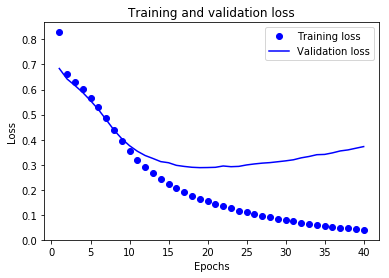

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

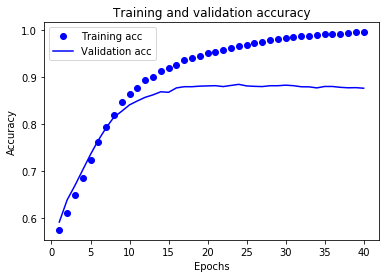

In [20]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Part 9.5: Transfer Learning for Keras Feature Engineering

# Module 9 Assignment

You can find the first assignment here: [assignment 9](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class9.ipynb)